**LIME CODE** FOR CNN- IMAGE CLASSIFICATION with pre-trained model (VGG16)

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!git clone https://github.com/mesushan/CNN-for-image-Classification.git

Cloning into 'CNN-for-image-Classification'...
remote: Enumerating objects: 10026, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 10026 (delta 0), reused 13 (delta 0), pack-reused 10012
Receiving objects: 100% (10026/10026), 216.96 MiB | 24.34 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (10007/10007), done.


In [ ]:
! ls

CNN-for-image-Classification  sample_data


In [ ]:
import tensorflow as tf

In [ ]:
# Initialising the CNN
model = tf.keras.models.Sequential()

In [ ]:
# 32 feature detectors with 3*3 dimensions so the convolution layer compose of 32 feature maps
# 128 by 128 dimensions with colored image(3 channels)  (tensorflow backend)
input_size = (128, 128)
model.add(tf.keras.layers.Convolution2D(32, 3, 3, input_shape = (*input_size, 3), activation = 'relu'))

In [ ]:
# reduce the size of feature maps and therefore reduce the number of nodes in the future fully connected layer (reduce time complexity, less compute intense without losing the performace). 2 by 2 deminsion is the recommended option
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

In [ ]:
model.add(tf.keras.layers.Convolution2D(32, 3, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# flatten all the feature maps in the pooling layer into single vector
model.add(tf.keras.layers.Flatten())

In [ ]:
# making classic ann which compose of fully connected layers
# number of nodes in hidden layer (output_dim) (common practice is to take the power of 2)
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# image augmentation technique to enrich our dataset(training set) without adding more images so get good performance  results with little or no overfitting even with the small amount of images
# used from keras documentation (flow_from_directory method)

from keras.preprocessing.image import ImageDataGenerator
batch_size = 32
# image augmentation part
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# create training set
# wanna get higher accuracy -> inccrease target_size
training_set = train_datagen.flow_from_directory('/content/CNN-for-image-Classification/dataset/training_set',
                                                 target_size = input_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

# create test set
# wanna get higher accuracy -> inccrease target_size
test_set = test_datagen.flow_from_directory('/content/CNN-for-image-Classification/dataset/test_set',
                                            target_size = input_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary')

# fit the cnn model to the trainig set and testing it on the test set
history=model.fit(training_set,
          steps_per_epoch = 8000/batch_size,
          epochs = 35,
          validation_data = test_set,
          validation_steps = 2000/batch_size)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/35
250/250 [==============================] - 69s 260ms/step - loss: 0.6916 - accuracy: 0.5253 - val_loss: 0.6841 - val_accuracy: 0.5325
Epoch 2/35
250/250 [==============================] - 63s 250ms/step - loss: 0.6730 - accuracy: 0.5870 - val_loss: 0.6436 - val_accuracy: 0.6525
Epoch 3/35
250/250 [==============================] - 62s 247ms/step - loss: 0.6413 - accuracy: 0.6355 - val_loss: 0.6106 - val_accuracy: 0.6805
Epoch 4/35
250/250 [==============================] - 59s 237ms/step - loss: 0.6104 - accuracy: 0.6659 - val_loss: 0.5749 - val_accuracy: 0.7065
Epoch 5/35
250/250 [==============================] - 62s 247ms/step - loss: 0.5867 - accuracy: 0.6871 - val_loss: 0.5619 - val_accuracy: 0.7170
Epoch 6/35
250/250 [==============================] - 61s 243ms/step - loss: 0.5709 - accuracy: 0.7041 - val_loss: 0.5520 - val_accuracy: 0.7250
Epoch 7/35
250/250 [==========================

In [ ]:
import numpy as np
from keras.preprocessing import image

In [ ]:
test_image = image.load_img('/content/CNN-for-image-Classification/dataset/single_prediction/cat_or_dog_4.jpg', target_size= input_size)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)


1/1 [==============================] - 0s 25ms/step


In [ ]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
if result [0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [ ]:
prediction

'cat'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

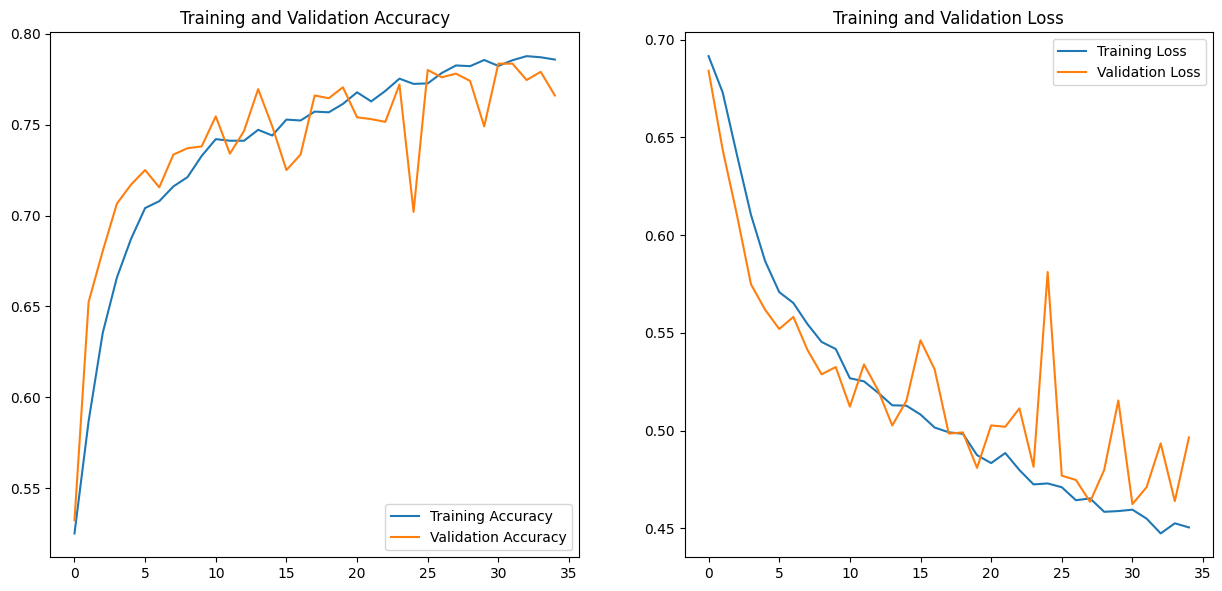

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(35)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
pip install lime scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7b565a5bc55341b14610e0bbc6355a2168a6aa6a1e1f942d11e33a53a643ddf8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


35363/35363 [==============================] - 0s 0us/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 6s 6s/step


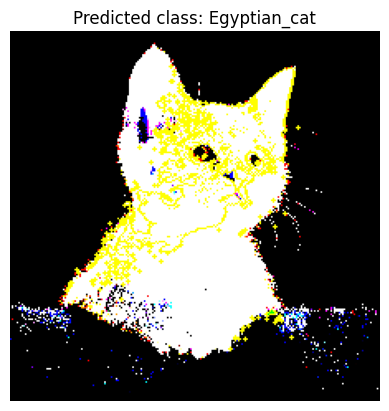

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.segmentation import mark_boundaries
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.preprocessing import image
from lime import lime_image

# Load a pre-trained VGG16 model (or any other CNN model of your choice)
model = VGG16(weights='imagenet')

# Function to preprocess an image for the VGG16 model
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Path to the image you want to explain
image_path = '/content/CNN-for-image-Classification/dataset/single_prediction/cat_or_dog_4.jpg'

# Preprocess the image
img_array = preprocess_image(image_path)

# Get the top prediction from the model
preds = model.predict(img_array)
predicted_class = decode_predictions(preds, top=1)[0][0]

# Define the LIME explainer for image classification
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=1, hide_color=0, num_samples=1000)

# Get the explanation for the top prediction
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)

# Superimpose the explanation on the original image
img = imread(image_path)
superimposed_img = mark_boundaries(temp / 2 + 0.5, mask)

# Display the superimposed image
plt.imshow(superimposed_img)
plt.title(f"Predicted class: {predicted_class[1]}")
plt.axis('off')
plt.show()
